# k近邻算法
> 思想简单

> 应用数学知识少（几乎为0）

> 效果好（缺点）

> 可以解释机器算法使用过程中的很多细节问题

> 更完整的刻画机器学习应用的流程

<img src="./picture/1.png"
style="width:700px;height:300px;float:left">

<img src="./picture/2.png"
style="width:700px;height:300px;float:left">

               寻找最近的k个点，根据样本的相似度来确定新的采样点的label

## kNN基础
> **python列表中的数据作为原始数据特征，numpy中的数组作为训练集**

> **使用fancy indexing和比较筛选数据**



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_x = [[3.3935, 2.3312], ##样本原始特征-以python的列表给出
             [3.1100, 1.7815],
             [1.3438, 3.3683],
             [3.5822, 4.6791],
             [2.2803, 2.8669],
             [7.4234, 4.4965],
             [5.7450, 3.5339],
             [9.1721, 2.5111],
             [7.7927, 3.4240],
             [7.9398, 0.7916]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] ## 样本label-y

In [3]:
x_train = np.array(raw_data_x)##原始数据作为训练集,传入numpy数组中
y_train = np.array(raw_data_y)

In [4]:
x_train

array([[3.3935, 2.3312],
       [3.11  , 1.7815],
       [1.3438, 3.3683],
       [3.5822, 4.6791],
       [2.2803, 2.8669],
       [7.4234, 4.4965],
       [5.745 , 3.5339],
       [9.1721, 2.5111],
       [7.7927, 3.424 ],
       [7.9398, 0.7916]])

---
注意使用fancy indexing 和比较的方式筛选数据

训练集是两个特征，因此使用散点图绘制

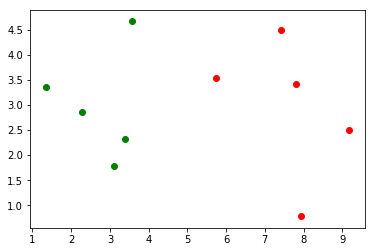

In [5]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], color='g') 
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='r')
plt.show()

In [6]:
x = np. array([8.0936, 3.3657])

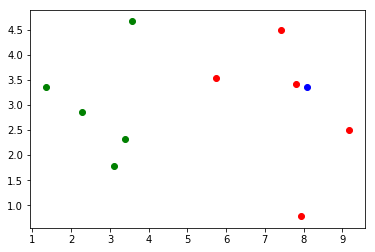

In [7]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], color='g') 
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN的过程
> **采用universal方法计算距离（非矩阵的运算）,将结果保存在一个列表中**

> **利用argsort方法，返回距离列表的索引值，并利用切片的方法将特征返回（nearest[:k]）**

> **利用counter类下的couner方法和most_commen（1）方法统计最多的特征值，例子：votes = Counter(x)    votes.most_commen(1)[1][1] **

In [8]:
from math import sqrt
distances = []
for x_d in x_train:
    d = sqrt(np.sum((x_d - x) ** 2)) #使用的是universal方法，对应位置运算，与矩阵运算不同
    distances.append(d) 

In [9]:
distances

[4.81260119478022,
 5.22933634412628,
 6.749800500755559,
 4.698696576711461,
 5.834660086928801,
 1.3144872308242483,
 2.354615297665417,
 1.3760462964595341,
 0.3064958401022765,
 2.578690607653427]

In [10]:
np.argsort(distances)

array([8, 5, 7, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [11]:
nearest = np.argsort(distances) ##argsort返回索引值的排序

In [12]:
k = 6

In [14]:
topK_y = [y_train[i] for i in nearest[:k]] ##利用切片的方式返回特征
topK_y

[1, 1, 1, 1, 1, 0]

In [16]:
from collections import Counter ##利用counter模块下的most_commen方法统计最多的特征值
Counter(topK_y)

Counter({0: 1, 1: 5})

In [17]:
votes = Counter(topK_y)

In [18]:
votes.most_common(2)

[(1, 5), (0, 1)]

In [19]:
votes.most_common(1)

[(1, 5)]

In [23]:
votes.most_common(2)[0][0] ##most_commen（1）方法返回是列表，第一个【0】返回的是元组，第二个【0】返回的是特征值

1

In [22]:
predict_y = votes.most_common(2)[0][0]
predict_y

1